In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
home = pd.read_csv('home_completed.csv')
away = pd.read_csv('away_completed.csv')
#number of points a team won or lost by
home['+/-'] = home['+/-']/5
#puts the odds into floats
home['Spread'] = home['Spread'].replace(' PK', '0').astype(float)
#gets how many points a team went over or under the spread
home['Cover'] = home['Spread'] + home['+/-']
#true or false on whether a team covered the spread
home['ATS'] = np.where(home['Cover'].isnull(), np.nan,
          np.where(home['Cover'] > 0,   1, 0))
#number of points a team won or lost by
away['+/-'] = away['+/-']/5
#puts the odds into floats
away['Spread'] = away['Spread'].replace(' PK', '0').astype(float)
#gets how many points a team went over or under the spread
away['Cover'] = away['Spread'] + away['+/-']
#true or false on whether a team covered the spread
away['ATS'] = np.where(away['Cover'].isnull(), np.nan,
          np.where(away['Cover'] > 0,   1, 0))

In [3]:
#put all data into one large data frame
main = home.append(away, ignore_index=True).sort_values(['Checker']) # puts into date order
#put columns into more organized order
main = main[['Year','Month', 'Day' , 'Team', 'Spread', 'Line', '+/-', '3P', '3P%', '3PA', '3PAr', 'AST', 'BLK', 'DRB', 'Day',
       'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr', 'Home', 'Losses',
        'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV', 'TS%', 'Wins',
        'eFG%',  'Checker', 'ATS']]
teams = list(main['Team'])
new_teams = []
#adds the opponent to the df
for i in range(0, len(teams), 2):
    new_teams.append(teams[i+1])
    new_teams.append(teams[i])
main['Opponent'] = new_teams
main = main.dropna()

In [5]:
#Function to get all game data for every team, returns a dataframe
def team_df(team):
    t = main[main['Team']== team].reset_index()
    del t['index']
    t['Season'] = t['Checker'].apply(season) #define what season a game is played
    t['Games Played'] = t['Wins'] + t['Losses'] #total games played
    #create running averages for all stats up to a given game date
    t_df = pd.DataFrame()
    #portion to get average seasonal data leading up to a certain game
    for year in years:
        temp = t[t['Season']==year].reset_index()
        temp['Avg Win/Loss'] = (temp['+/-'].cumsum() - temp['+/-'])/temp.index
        temp['Avg 3P'] = (temp['3P'].cumsum() - temp['3P'])/temp.index
        temp['Avg 3PA'] = (temp['3PA'].cumsum() - temp['3PA'])/temp.index
        temp['Avg 3P%'] = (temp['Avg 3P']/temp['Avg 3PA'])
        temp['Avg Starter MP'] = (temp['Starters MP'].cumsum() - temp['Starters MP'])/temp.index
        temp['Avg AST'] = (temp['AST'].cumsum() - temp['AST'])/temp.index
        temp['Avg BLK'] = (temp['BLK'].cumsum() - temp['BLK'])/temp.index
        temp['Avg DRB'] = (temp['DRB'].cumsum() - temp['DRB'])/temp.index
        temp['Avg ORB'] = (temp['ORB'].cumsum() - temp['ORB'])/temp.index
        temp['Avg FG'] = (temp['FG'].cumsum() - temp['FG'])/temp.index
        temp['Avg FGA'] = (temp['FGA'].cumsum() - temp['FGA'])/temp.index
        temp['Avg FG%'] = (temp['Avg FG']/temp['Avg FGA'])
        temp['Avg FT'] = (temp['FT'].cumsum() - temp['FT'])/temp.index
        temp['Avg FTA'] = (temp['FTA'].cumsum() - temp['FTA'])/temp.index
        temp['Avg 3PAr'] = (temp['Avg 3PA']/temp['Avg FGA'])
        temp['Avg FTr'] = (temp['Avg FTA']/temp['Avg FGA'])
        temp['Avg 3P%'] = (temp['Avg FT']/temp['Avg FTA'])/temp.index
        temp['Avg PF'] = (temp['PF'].cumsum() - temp['PF'])/temp.index
        temp['Avg PTS'] = (temp['PTS'].cumsum() - temp['PTS'])/temp.index
        temp['Avg STL'] = (temp['STL'].cumsum() - temp['STL'])/temp.index
        temp['Avg TOV'] = (temp['TOV'].cumsum() - temp['TOV'])/temp.index
        temp['Avg TS%'] = temp['Avg PTS']/ (2*(temp['Avg FGA'] + .44 * temp['Avg FTA']))
        temp['Avg eFG%'] = (temp['Avg FG'] + .5 * temp['Avg 3P'])/ temp['Avg FGA']
        temp['Winning Percentage'] = temp['Wins']/temp.index
        ###
        #portion to get data for the last 5 games prior to a certain game
        temp['5 Game Win/Loss'] = temp['+/-'].rolling(5, min_periods=1).sum()-temp['+/-']
        temp['5 Game 3P'] = temp['3P'].rolling(5, min_periods=1).sum() - temp['3P']
        temp['5 Game 3PA'] = temp['3PA'].rolling(5, min_periods=1).sum()- temp['3PA']
        temp['5 Game 3P%'] = temp['5 Game 3P']/temp['5 Game 3PA']
        temp['5 Game Starter MP'] = temp['Starters MP'].rolling(5, min_periods=1).sum()-temp['Starters MP']
        temp['5 Game AST'] = temp['AST'].rolling(5, min_periods=1).sum() - temp['AST']
        temp['5 Game BLK'] = temp['BLK'].rolling(5, min_periods=1).sum() - temp['BLK']
        temp['5 Game DRB'] = temp['DRB'].rolling(5, min_periods=1).sum() - temp['DRB']
        temp['5 Game ORB'] = temp['ORB'].rolling(5, min_periods=1).sum() - temp['ORB']
        temp['5 Game FG'] = temp['FG'].rolling(5, min_periods=1).sum() - temp['FG']
        temp['5 Game FGA'] = temp['FGA'].rolling(5, min_periods=1).sum() - temp['FGA']
        temp['5 Game FG%'] = temp['5 Game FG']/temp['5 Game FGA']
        temp['5 Game FT'] = temp['FT'].rolling(5, min_periods=1).sum() - temp['FT']
        temp['5 Game FTA'] = temp['FTA'].rolling(5, min_periods=1).sum() - temp['FTA']
        temp['5 Game 3PAr'] = temp['5 Game 3PA']/temp['5 Game FGA']
        temp['5 Game FTr'] = temp['5 Game FTA']/temp['5 Game FGA']
        temp['5 Game 3P%'] = temp['5 Game FT']/temp['5 Game FTA']
        temp['5 Game PF'] = temp['PF'].rolling(5, min_periods=1).sum() - temp['PF']
        temp['5 Game PTS'] = temp['PTS'].rolling(5, min_periods=1).sum() - temp['PTS']
        temp['5 Game STL'] = temp['STL'].rolling(5, min_periods=1).sum() - temp['STL']
        temp['5 Game TOV'] = temp['TOV'].rolling(5, min_periods=1).sum() - temp['TOV']
        temp['5 Game TS%'] = temp['5 Game PTS']/ (2*(temp['5 Game FGA'] + .44 * temp['5 Game FTA']))
        temp['5 Game eFG%'] = (temp['5 Game FG'] + .5 * temp['5 Game 3P'])/ temp['5 Game FGA']
        t_df = t_df.append(temp)
    return t_df

In [6]:
#put each row into a season
def season(date):
    date = date[:6]
    if date < '200809':
        return '2007'
    elif date < '200909':
        return '2008'
    elif date < '201009':
        return '2009'
    elif date < '201109':
        return '2010'
    elif date < '201109':
        return '2010'
    elif date < '201209':
        return '2011'
    elif date < '201309':
        return '2012'
    elif date < '201409':
        return '2013'
    elif date < '201509':
        return '2014'
    elif date < '201609':
        return '2015'
    elif date < '201709':
        return '2016'
    elif date < '201809':
        return '2017'
    elif date < '201909':
        return '2018'
    

In [7]:
teams = set(teams)
years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
all_team_data = {}
#creating a dictionary with dataframes of average and 5 game data fro all teams
for team in teams:
    all_team_data[team] = team_df(team)

In [9]:
#create giant dataframe with all teams
all_team_data_matrix = pd.DataFrame(columns=list(all_team_data.values())[0].columns)
for team in all_team_data.values():
    all_team_data_matrix= all_team_data_matrix.append(team)

In [10]:
#remove duplicate games
all_team_data_matrix = all_team_data_matrix[all_team_data_matrix['Home']==1]

In [11]:
#select only certain columns
home = home[['Team', 'Spread', 'Line', '+/-', '3P', '3P%', '3PA', '3PAr', 'AST', 'BLK', 'Cover', 'DRB', 'Day',
       'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr', 'Home', 'Losses',
        'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV', 'TS%', 'Wins',
        'eFG%',  'Checker']]
away = away[['Team', '3P', '3P%', '3PA', '3PAr', 'AST', 'BLK', 'DRB', 
       'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr', 'Losses',
        'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV', 'TS%', 'Wins',
        'eFG%',  'Checker']]

In [12]:
#rename columns in order to merge
away = away.rename(columns = {'Team': 'Opponent', '+/-':'opp  +/-', '3P':'opp 3P', '3PA':'opp 3PA' ,
       '3P%':'opp 3P%', 'Starter MP':'opp Starter MP', 'AST':'opp AST', 'BLK':'opp BLK', 'DRB':'opp DRB', 'ORB':'opp ORB', 'FT%':'opp FT%',
       'FG':'opp FG', 'FGA':'opp FGA', 'FG%':'opp FG%', 'FT':'opp FT', 'FTA':'opp FTA', '3PAr':'opp 3PAr', 'PTS':'opp PTS', 'PF':'opp PF',
       'FTr':'opp FTr', ' PF':'opp PF', ' PTS':'opp PTS', 'STL':'opp STL', 'TOV':'opp TOV', 'TS%':'opp TS%', 'Starters MP':'opp Starters MP',
       'eFG%':'opp eFG%', 'Winning Percentage':'oppWinning Percentage', 'TS%': 'opp TS%', 'Wins': 'opp Wins', 'Losses':'opp Losses'})

In [13]:
merged = home.merge(away)

In [16]:
#see which statistics are most important
#columns just for the phi matrix
stat_columns = ['Spread', 'Line', '+/-', '3P', '3P%', '3PA', '3PAr', 'AST',
       'BLK', 'Cover', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr',
       'Home', 'Losses', 'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV',
       'TS%', 'Wins', 'eFG%']
#specific stats to look at
statistics = ['3P', '3P%', '3PA', '3PAr', 'AST',
       'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr',
       'Losses', 'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV',
       'TS%', 'Wins', 'eFG%']
statistic_importance = pd.DataFrame(columns = stat_columns)
statistic_importance[['Spread', 'Line', '+/-', 'Cover']] = merged[['Spread', 'Line', '+/-', 'Cover']]

In [17]:
#df for spreads instead of winning
statistic_importance2 = statistic_importance.copy()
#loop through and determine which team was better in each stat and compare to final score 
for stat in statistics:
    opp = 'opp ' + stat #opponents statistic string 
    perc = stat + 'percentage' #creates new categories
    statistic_importance[perc] = merged[stat] - merged[opp] #for straight victory
    statistic_importance2[perc] = merged[stat] - merged[opp] #against the spread
    statistic_importance[stat] = statistic_importance['+/-'] * statistic_importance[perc] #determines wehther statistic impacted victory
    statistic_importance2[stat] = statistic_importance2['Cover'] * statistic_importance2[perc] #determines wehther statistic impacted spread


In [18]:
#create binary values
win_importance = statistic_importance[statistics]
win_importance[win_importance > 0] = 1
win_importance = win_importance.replace(0, np.nan)
win_importance = win_importance.clip(lower=0)

/Users/ericweltz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ericweltz/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [19]:
#create binary values
cover_importance = statistic_importance2[statistics]
cover_importance[cover_importance > 0] = 1
cover_importance = cover_importance.replace(0, np.nan)
cover_importance = cover_importance.clip(lower=0)

/Users/ericweltz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ericweltz/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [20]:
lst = []
lst2 = []
cols = ['3P', '3P%', '3PA', '3PAr', 'AST',
       'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr',
       'Losses', 'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV',
       'TS%', 'Wins', 'eFG%']
#find how often a statistic mattered 
for col in cols:
    lst.append(win_importance[col].dropna().sum()/len(win_importance[col].dropna()))
    lst2.append(cover_importance[col].dropna().sum()/len(cover_importance[col].dropna()))
winning_percentages = pd.DataFrame([lst], columns=cols)
spread_percentages = pd.DataFrame([lst2], columns=cols)

In [21]:
winning_percentages

,3P,3P%,3PA,3PAr,AST,BLK,DRB,FG,FG%,FGA,...,Losses,ORB,PF,PTS,STL,Starters MP,TOV,TS%,Wins,eFG%
0,0.646863,0.68585,0.517271,0.637011,0.715091,0.612496,0.738182,0.775757,0.795544,0.469627,...,0.344292,0.481534,0.413685,0.978951,0.59847,0.519371,0.419034,0.840248,0.654292,0.807753


In [22]:
spread_percentages

,3P,3P%,3PA,3PAr,AST,BLK,DRB,FG,FG%,FGA,...,Losses,ORB,PF,PTS,STL,Starters MP,TOV,TS%,Wins,eFG%
0,0.63856,0.683024,0.508481,0.624436,0.674568,0.558615,0.694251,0.753674,0.743058,0.504289,...,0.49813,0.48693,0.491816,0.804499,0.580391,0.510638,0.440387,0.763215,0.499456,0.756898


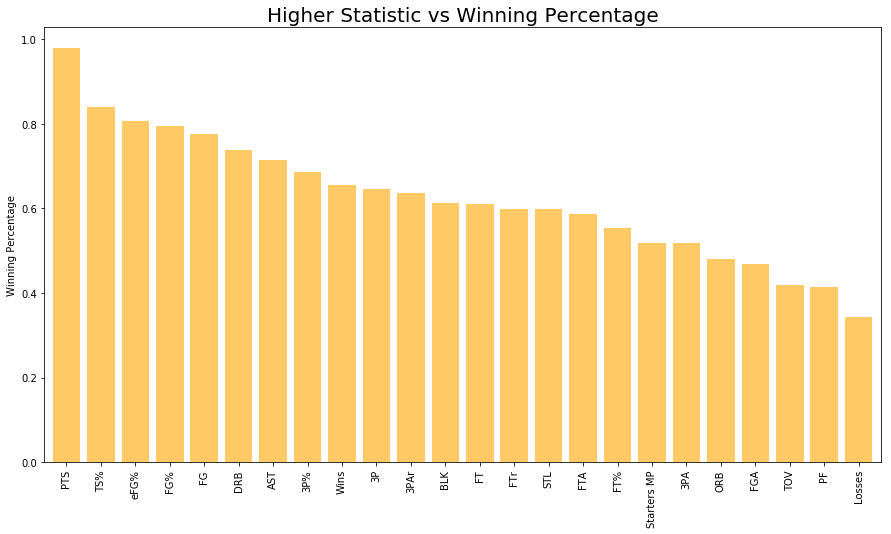

In [23]:
import matplotlib.pyplot as plt
ax = winning_percentages.transpose().sort_values(by=0, ascending=False).plot.bar(color='orange', alpha=.6, width=.8, figsize=(15,8))
ax.set_title("Higher Statistic vs Winning Percentage", fontsize=20)
ax.set_ylabel('Winning Percentage')
ax.legend().set_visible(False)

plt.show()

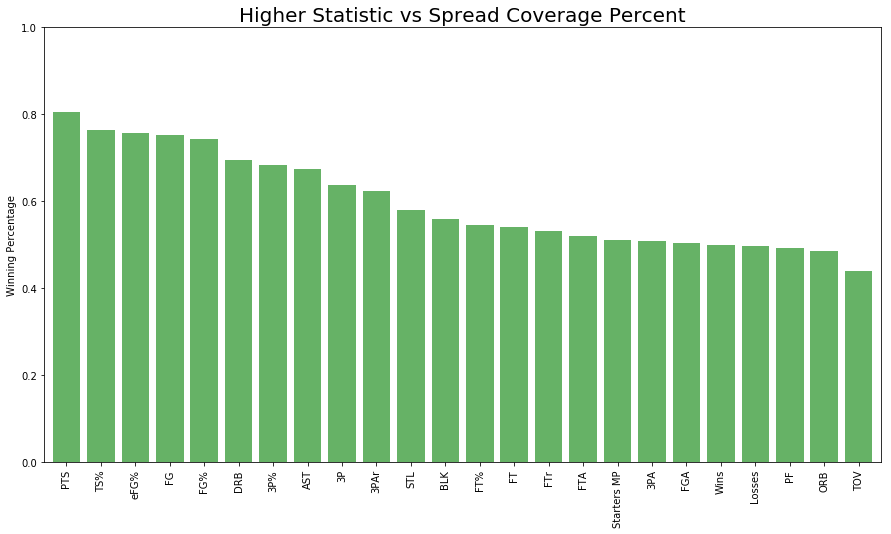

In [24]:
ax = spread_percentages.transpose().sort_values(by=0, ascending=False).plot.bar(color='green', alpha=.6, width=.8, figsize=(15,8))
ax.set_title("Higher Statistic vs Spread Coverage Percent", fontsize=20)
ax.set_ylabel('Winning Percentage')
ax.set_ylim([0,1])
ax.legend().set_visible(False)

plt.show()

In [25]:
merged.columns

Index(['Team', 'Spread', 'Line', '+/-', '3P', '3P%', '3PA', '3PAr', 'AST',
       'BLK', 'Cover', 'DRB', 'Day', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA',
       'FTr', 'Home', 'Losses', 'ORB', 'PF', 'PTS', 'STL', 'Starters MP',
       'TOV', 'TS%', 'Wins', 'eFG%', 'Checker', 'Opponent', 'opp 3P',
       'opp 3P%', 'opp 3PA', 'opp 3PAr', 'opp AST', 'opp BLK', 'opp DRB',
       'opp FG', 'opp FG%', 'opp FGA', 'opp FT', 'opp FT%', 'opp FTA',
       'opp FTr', 'opp Losses', 'opp ORB', 'opp PF', 'opp PTS', 'opp STL',
       'opp Starters MP', 'opp TOV', 'opp TS%', 'opp Wins', 'opp eFG%'],
      dtype='object')

In [26]:
#create data frames just for philadelphia games
phi = merged[merged['Team']=='Philadelphia']
phi_away = merged[merged['Opponent']=='Philadelphia']

In [27]:
#see which statistics are most important
#columns for the matrix 
stat_columns = ['Spread', 'Line', '+/-', '3P', '3P%', '3PA', '3PAr', 'AST',
       'BLK', 'Cover', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr',
       'Home', 'Losses', 'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV',
       'TS%', 'Wins', 'eFG%']
statistics = ['3P', '3P%', '3PA', '3PAr', 'AST',
       'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr',
       'Losses', 'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV',
       'TS%', 'Wins', 'eFG%']
statistic_importanceh = pd.DataFrame(columns = stat_columns)
statistic_importance2h = pd.DataFrame(columns = stat_columns)
statistic_importanceh[['Spread', 'Line', '+/-', 'Cover']] = phi[['Spread', 'Line', '+/-', 'Cover']]
statistic_importance2h[['Spread', 'Line', '+/-', 'Cover']] = phi[['Spread', 'Line', '+/-', 'Cover']]

In [28]:
statistic_importancea = statistic_importanceh.copy()
statistic_importance2a = statistic_importancea.copy()
for stat in statistics:
    opp = 'opp ' + stat
    perc = stat + 'percentage'
    #home data
    statistic_importanceh[perc] = phi[stat] - phi[opp]
    statistic_importance2h[perc] = phi[stat] - phi[opp]
    statistic_importanceh[stat] = statistic_importanceh['+/-'] * statistic_importanceh[perc]
    statistic_importance2h[stat] = statistic_importance2h['Cover'] * statistic_importance2h[perc]
    #away data
    statistic_importancea[perc] =   phi_away[opp] - phi_away[stat]
    statistic_importance2a[perc] =  phi_away[opp] - phi_away[stat] 
    statistic_importancea[stat] = statistic_importancea['+/-'] * statistic_importancea[perc]
    statistic_importance2a[stat] = statistic_importance2a['Cover'] * statistic_importance2a[perc]
    statistic_importance = statistic_importanceh.append(statistic_importancea)
    statistic_importance2 = statistic_importance2h.append(statistic_importance2a)

In [29]:
#create binary values
win_importance = statistic_importance[statistics]
win_importance[win_importance > 0] = 1
win_importance = win_importance.replace(0, np.nan)
win_importance = win_importance.clip(lower=0)

/Users/ericweltz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ericweltz/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [30]:
#create binary values
cover_importance = statistic_importance2[statistics]
cover_importance[cover_importance > 0] = 1
cover_importance = cover_importance.replace(0, np.nan)
cover_importance = cover_importance.clip(lower=0)

/Users/ericweltz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ericweltz/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [31]:
lst = []
lst2 = []
cols = ['3P', '3P%', '3PA', '3PAr', 'AST',
       'BLK', 'DRB', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'FTr',
       'Losses', 'ORB', 'PF', 'PTS', 'STL', 'Starters MP', 'TOV',
       'TS%', 'Wins', 'eFG%']
#find importance percentages
for col in cols:
    lst.append(win_importance[col].dropna().sum()/len(win_importance[col].dropna()))
    lst2.append(cover_importance[col].dropna().sum()/len(cover_importance[col].dropna()))
phi_percentages = pd.DataFrame([lst], columns=cols)
phi_spread_percentages = pd.DataFrame([lst2], columns=cols)

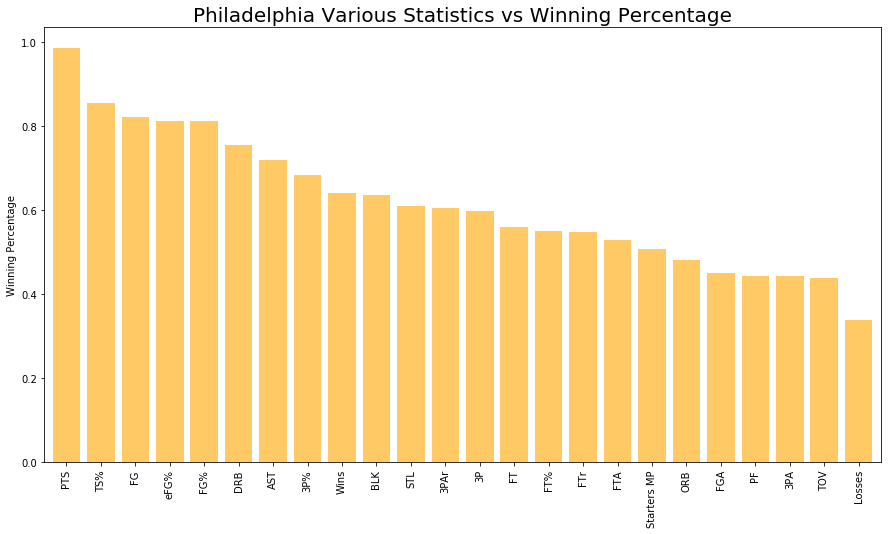

In [37]:
ax = phi_percentages.transpose().sort_values(by=0, ascending=False).plot.bar(color='orange', alpha=.6, width=.8, figsize=(15,8))
ax.set_title("Philadelphia Various Statistics vs Winning Percentage", fontsize=20)
ax.set_ylabel('Winning Percentage')
ax.legend().set_visible(False)

plt.show()

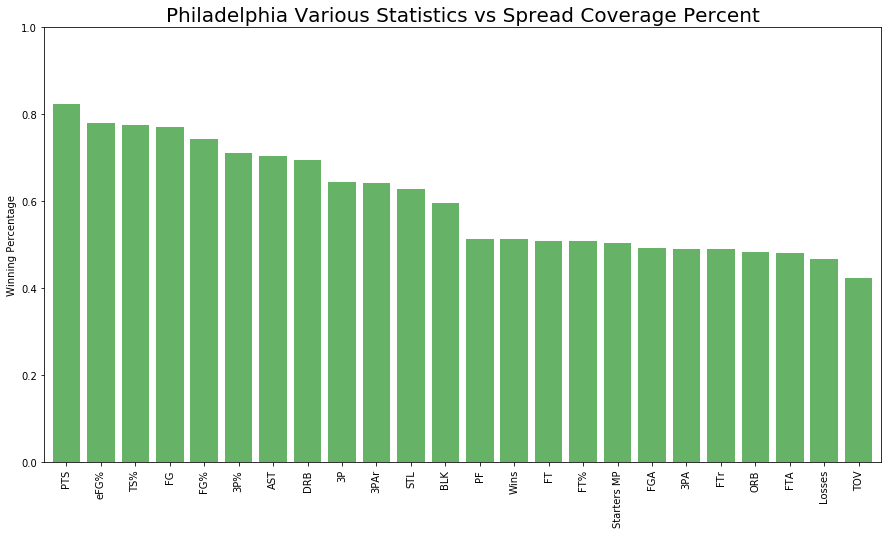

In [36]:
ax = phi_spread_percentages.transpose().sort_values(by=0, ascending=False).plot.bar(color='green', alpha=.6, width=.8, figsize=(15,8))
ax.set_title("Philadelphia Various Statistics vs Spread Coverage Percent", fontsize=20)
ax.set_ylabel('Winning Percentage')
ax.set_ylim([0,1])
ax.legend().set_visible(False)

plt.show()

In [34]:
#load the percentage of times each team covered the spread into a series
ats = dict()
teams = list(set(all_team_data_matrix['Team'].tolist()))
for team in teams:
    df = team_df(team)
    ats[team] = df['ATS'].sum()/len(df['ATS'])
cover = pd.Series(ats)

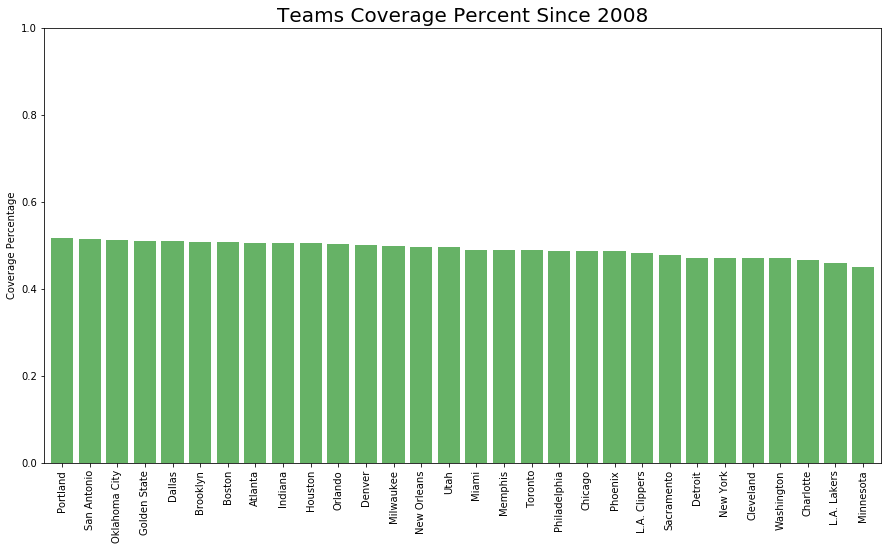

In [35]:
ax = cover.sort_values(ascending=False).plot.bar(color='green', alpha=.6, width=.8, figsize=(15,8))
ax.set_title("Teams Coverage Percent Since 2008", fontsize=20)
ax.set_ylabel('Coverage Percentage')
ax.set_ylim([0,1])
ax.legend().set_visible(False)

plt.show()

In [63]:
#find a matrix for the major basketball indicators - shooting, turnovers, rebounding, and free throw shooting 
core_four = merged[['eFG%', 'ORB', 'DRB', 'TOV', 'FTr', 'opp eFG%', 'opp ORB', 'opp DRB', 'opp TOV', 'opp FTr']]

In [81]:
#normalize the data
norm =(core_four- core_four.mean())/core_four.std()
norm['TOV'] = - norm['TOV']
norm['opp TOV'] = - norm['opp TOV']
norm['+/-'] = merged['+/-']
norm['Cover'] = merged['Cover']

In [82]:
norm['Four Factors'] = .4 * norm['eFG%'] + .1 * norm['ORB'] + .1 *norm['DRB'] + .25 * norm['TOV'] + .15 * norm['FTr']
norm['opp Four Factors'] = .4 * norm['opp eFG%'] + .1 * norm['opp ORB'] + .1 *norm['opp DRB'] + .25 * norm['opp TOV'] + .15 * norm['opp FTr']

In [83]:
def pos(x):
    if(x>0):
        return(1)
    else:
        return(0)

In [84]:
# get values for straight wins and ats based on 4 factors
norm['Compare'] = norm['Four Factors'] - norm['opp Four Factors']
norm['Result'] = (norm['Compare'] * norm['+/-']).apply(pos)
norm['Spread Result'] = (norm['Compare'] * norm['Cover']).apply(pos)

In [85]:
norm['Result'].sum()/len(norm)

0.909241265247054

In [86]:
norm['Spread Result'].sum()/len(norm)

0.7983598649300531